<a href="https://colab.research.google.com/github/jakejhc/jakejhc/blob/main/10_pca_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('./sales.csv')

In [18]:
df.dropna(subset=['price'], inplace=True)

In [19]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [20]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a transformer class to extract numerical features (**cost**, **weight**, **height**, **width**, and **depth**) and replace the missing values with the averages in train_raw.

In [21]:
class Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x
    
    def height2num(self, x):
        if type(x) == str: 
            x = x.strip(' meters')
            return float(x)
        else:
            return x
    
    def width2num(self, x):
        if type(x) == str: 
            x = x.strip(' cm')
            return float(x)
        else:
            return x
        
    def depth2num(self, x):
        if type(x) == str: 
            x = x.strip(' cm')
            return float(x)
        else:
            return x
        
    def weight2num(self, x):
        if type(x) == str:
            x = x.strip("Kg").replace(" ", "").split("Ton")
            return float(x[0])*1000 + float(x[1])
        else:
            return x

<font color='red'>Assignment:</font> Wrap up the numerical transformer and MinMaxScaler as a pipeline for data transformation.  
**Note:** we don't need linear regression at this time.

In [22]:


from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = list(train_raw.columns)
target = 'price'
features.remove(target)

def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

In [23]:
steps = [('ctf', Transformer()),
         ('rescale', MinMaxScaler())]
model = Pipeline(steps)

<font color='red'>Assignment:</font> Transform **train_raw** and assign the output to a variable **X_train**.

In [29]:
X_train = train_raw[features]
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)

(y_test.shape, X_test.shape)

((429,), (429, 11))

In [30]:
X_train=model.fit_transform(X_train)

**Example:** import PCA from sklearn.

In [31]:
from sklearn.decomposition import PCA

<font color='red'>Question:</font> What is PCA?

In [32]:
#Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. 

<font color='red'>Assignment:</font> Transform **X_train** using **PCA**. Assign the output to a variable **X_train_pca**.

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)


# 2. Variance

<font color='red'>Assignment:</font> Plot **explained_variance_ratio_** in a bar chart.

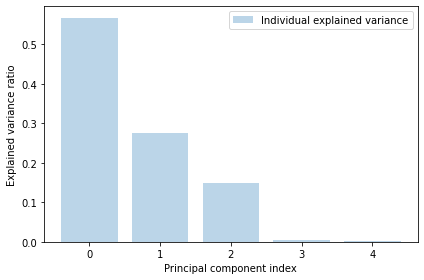

In [52]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np


exp_var_pca = pca.explained_variance_ratio_


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=.3, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.tight_layout()
plt.show()

<font color='red'>Question:</font> How principal components are ranked?

In [53]:
#based on variance

<font color='red'>Question:</font> What percentage of variance is kept in the first principle component?

In [54]:
#55

<font color='red'>Question:</font> How do the original features contribute to the first principle component?

In [55]:
#https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a
#thru eigenvalues



<font color='red'>Question:</font> What is the relationship between the principal components and original features? Is PCA a linear function?

In [56]:
Yes
PCA is a dimensionality reduction that identifies important relationships in our data, transforms the existing data based on these relationships, and then quantifies the importance of these relationships so we can keep the most important relationships and drop the others. To remember this definition, we can break it down into four steps:

We identify the relationship among features through a Covariance Matrix.
Through the linear transformation or eigendecomposition of the Covariance Matrix, we get eigenvectors and eigenvalues.
Then we transform our data using Eigenvectors into principal components.
Lastly, we quantify the importance of these relationships using Eigenvalues and keep the important principal components.

SyntaxError: ignored

<font color='red'>Assignment:</font> Plot the Variance versus the number of chosen principle components.

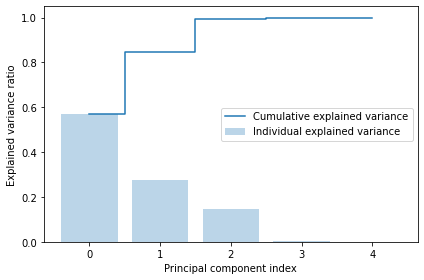

In [57]:

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=.3, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<font color='red'>Question:</font> How many principle components would you like to keep?

In [ ]:
#3

# 3. PCA Pipeline

<font color='red'>Assignment:</font> Build a pipeline to wrap up **Numerical Transformer**, **MinMaxScaler**, **PCA**, and **LinearRegression** to predict **price**. Find the best **n_components** for **PCA**.

In [64]:
features = list(train_raw.columns)
target = 'price'
features.remove(target)

def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

X_train = train_raw[features]
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)
from sklearn.preprocessing import StandardScaler  ######


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import matplotlib.pylab as plt

MAE_train = []
MAE_test = []
for n in range(0,31):
  steps = [('ctf', Transformer()),
         ('pca', PCA(n_components=n)),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
  model = Pipeline(steps)
  model=model.fit(X_train, y_train)
    
  sc = StandardScaler()
  sc.fit(X_train)
  X_train_std = sc.transform(X_train)
 #X_test_std = sc.transform(X_test)

  pca = PCA()
  X_train_pca = pca.fit_transform(X_train_std)


  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
    
  MAE_train.append(mean_absolute_error(y_train, y_train_pred))
  MAE_test.append(mean_absolute_error(y_test, y_test_pred))

ValueError: ignored

ValueError: ignored

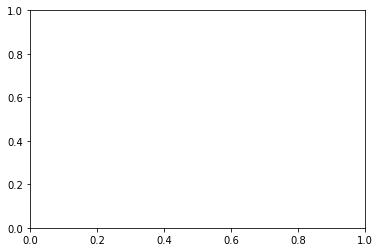

In [65]:
plt.plot(np.linspace(2, 30, 29), MAE_train)
plt.plot(np.linspace(2, 30, 29), MAE_test)

<font color='red'>Question:</font> What is the difference between PCA and SVD?

In [ ]:
The main difference between The Singular value decomposition and principal component analysis is that The SVD is a data-driven Fourier transform generalization, whereas PCA allows us to represent statistical variations in our data sets using a hierarchical coordinate system based on data.